In [1]:

import numpy as np
from src.layers.dense import DenseLayer
from src.layers.conv import ConvLayer
from src.layers.flatten import FlattenLayer
from src.layers.pool import MaxPoolLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc

from tensorflow.keras.datasets import fashion_mnist


In [2]:
N_TRAIN_SAMPLES = 2000
N_TEST_SAMPLES = 400
N_CLASSES = 10

((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

X_train = trainX[:N_TRAIN_SAMPLES, :, :]
y_train = trainY[:N_TRAIN_SAMPLES]

X_test = trainX[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES, :, :]
y_test = trainY[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES]

X_train = X_train / 255
X_train = np.expand_dims(X_train, axis=3)
y_train = one_hot_enc(y_train)
X_test = X_test / 255
X_test = np.expand_dims(X_test, axis=3)
y_test = one_hot_enc(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 28, 28, 1) (2000, 10)
(400, 28, 28, 1) (400, 10)


In [3]:

layers = [
    ConvLayer(filters=16, kernel_shape=(3,3,1), activation="relu"),
    MaxPoolLayer(pool_size=(2,2), stride=2),
    ConvLayer(filters=32, kernel_shape=(5 ,5 ,16), activation="relu"),
    MaxPoolLayer(pool_size=(3,3), stride=3),
    FlattenLayer(),
    DenseLayer(nodes_prev=288, nodes_curr=10, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent,
    costfn="CCE"
)


In [4]:
hist = model.fit(X_train,y_train, epoch=10, lr=0.005, bs=5)


Iteration: 1	 cost: 1.14068	accuracy: 59.25%
Iteration: 2	 cost: 0.83367	accuracy: 68.80%
Iteration: 3	 cost: 0.71941	accuracy: 74.30%
Iteration: 4	 cost: 0.65197	accuracy: 77.40%
Iteration: 5	 cost: 0.60558	accuracy: 78.85%
Iteration: 6	 cost: 0.56964	accuracy: 79.80%
Iteration: 7	 cost: 0.54199	accuracy: 81.30%
Iteration: 8	 cost: 0.51943	accuracy: 81.95%
Iteration: 9	 cost: 0.50066	accuracy: 82.65%
Iteration: 10	 cost: 0.48389	accuracy: 83.35%


In [5]:
from src.metrics import accuracy_categ_ce
accuracy_categ_ce(y=y_test, y_hat=model.predict(X_test))


0.78

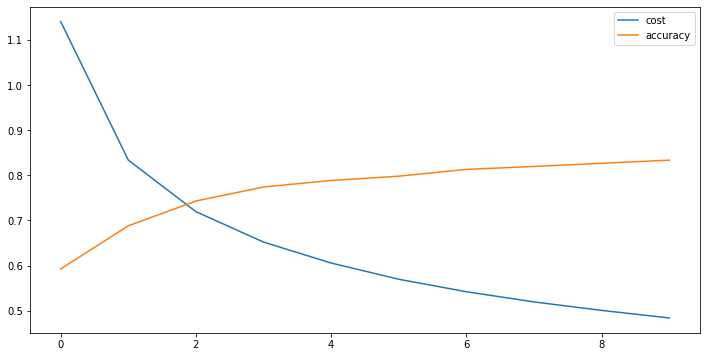

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()
